# Circuits for preparing MUB states
Each circuit represents basis transformation. In order to get a different state inside each basis, you eed to start from a different state in the computational basis (by adding X gates for the relevant qubits at the beggining of the circuit)

In [34]:
from qiskit import Aer, QuantumCircuit, transpile
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector

from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator


# 2 Qubit MUBs

In [3]:
MUB0_2q = QuantumCircuit(2)

MUB1_2q = QuantumCircuit(2)
MUB1_2q.h(0)
MUB1_2q.h(1)

MUB2_2q = QuantumCircuit(2)
MUB2_2q.h(0)
MUB2_2q.s(0)
MUB2_2q.h(1)
MUB2_2q.s(1)

MUB3_2q = QuantumCircuit(2)
MUB3_2q.h(0)
MUB3_2q.h(1)
MUB3_2q.s(1)
MUB3_2q.cz(0, 1)

MUB4_2q = QuantumCircuit(2)
MUB4_2q.h(0)
MUB4_2q.s(0)
MUB4_2q.h(1)
MUB4_2q.cz(0, 1)

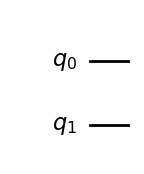

In [4]:
MUB0_2q.draw('mpl')

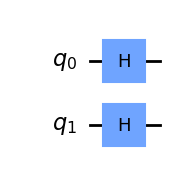

In [5]:
MUB1_2q.draw('mpl')

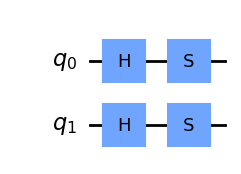

In [6]:
MUB2_2q.draw('mpl')

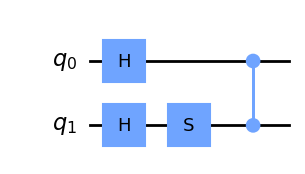

In [7]:
MUB3_2q.draw('mpl')

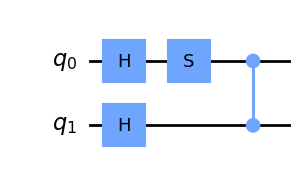

In [8]:
MUB4_2q.draw('mpl')

# 3 Qubit MUBs

In [9]:
MUB0_3q = QuantumCircuit(3)

MUB1_3q = QuantumCircuit(3)
MUB1_3q.h(0)
MUB1_3q.h(1)
MUB1_3q.h(2)

MUB2_3q = QuantumCircuit(3)
MUB2_3q.h(0)
MUB2_3q.s(0)
MUB2_3q.h(1)
MUB2_3q.s(1)
MUB2_3q.h(2)
MUB2_3q.s(2)

MUB3_3q = QuantumCircuit(3)
MUB3_3q.h(0)
MUB3_3q.s(0)
MUB3_3q.h(1)
MUB3_3q.h(2)
MUB3_3q.cz(1, 2)
MUB3_3q.cz(0, 1)

MUB4_3q = QuantumCircuit(3)
MUB4_3q.h(0)
MUB4_3q.h(1)
MUB4_3q.s(1)
MUB4_3q.h(2)
MUB4_3q.cz(1, 2)
MUB4_3q.cz(0, 2)

MUB5_3q = QuantumCircuit(3)
MUB5_3q.h(0)
MUB5_3q.h(1)
MUB5_3q.h(2)
MUB5_3q.s(2)
MUB5_3q.cz(0, 1)
MUB5_3q.cz(0, 2)

MUB6_3q = QuantumCircuit(3)
MUB6_3q.h(0)
MUB6_3q.s(0)
MUB6_3q.h(1)
MUB6_3q.s(1)
MUB6_3q.h(2)
MUB6_3q.cz(0, 1)
MUB6_3q.cz(0, 2)

MUB7_3q = QuantumCircuit(3)
MUB7_3q.h(0)
MUB7_3q.s(0)
MUB7_3q.h(1)
MUB7_3q.h(2)
MUB7_3q.s(2)
MUB7_3q.cz(1, 2)
MUB7_3q.cz(0, 2)

MUB8_3q = QuantumCircuit(3)
MUB8_3q.h(0)
MUB8_3q.h(1)
MUB8_3q.s(1)
MUB8_3q.h(2)
MUB8_3q.s(2)
MUB8_3q.cz(0, 1)
MUB8_3q.cz(1, 2)

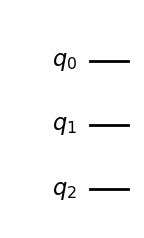

In [10]:
MUB0_3q.draw('mpl')

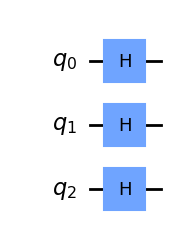

In [11]:
MUB1_3q.draw('mpl')

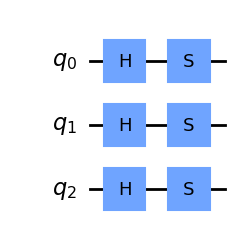

In [12]:
MUB2_3q.draw('mpl')

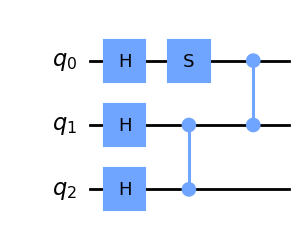

In [13]:
MUB3_3q.draw('mpl')

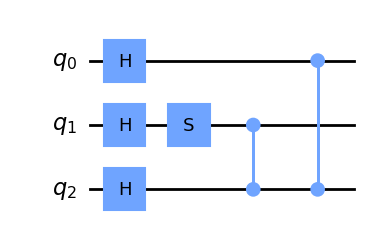

In [14]:
MUB4_3q.draw('mpl')

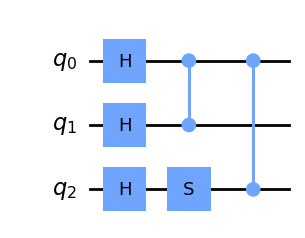

In [15]:
MUB5_3q.draw('mpl')

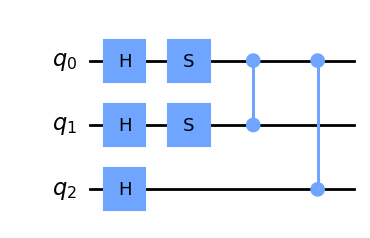

In [16]:
MUB6_3q.draw('mpl')

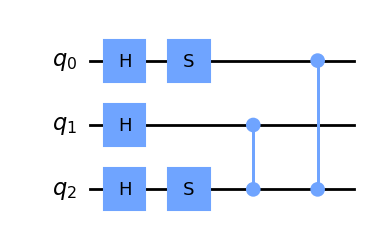

In [17]:
MUB7_3q.draw('mpl')

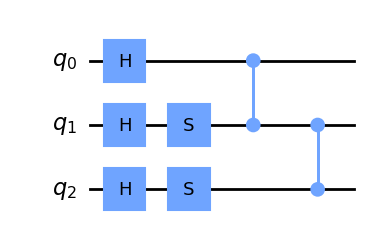

In [18]:
MUB8_3q.draw('mpl')

# Creating MUB states using hardware efficient ansatz

## We are using the following ansatz format:

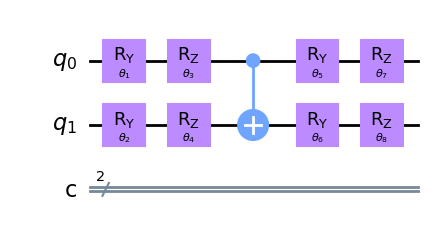

In [19]:
circ = QuantumCircuit(2,2)
theta1 = Parameter('$θ_1$')
theta2 = Parameter('$θ_2$')
theta3 = Parameter('$θ_3$')
theta4 = Parameter('$θ_4$')
theta5 = Parameter('$θ_5$')
theta6 = Parameter('$θ_6$')
theta7 = Parameter('$θ_7$')
theta8 = Parameter('$θ_8$')
circ.ry(theta1, 0)
circ.ry(theta2, 1)
circ.rz(theta3, 0)
circ.rz(theta4, 1)
circ.cx(0, 1)
circ.ry(theta5, 0)
circ.ry(theta6, 1)
circ.rz(theta7, 0)
circ.rz(theta8, 1)
circ.draw('mpl')

In [20]:
def ansatz_cz(theta):
    circ = QuantumCircuit(2,2)
    circ.ry(theta[0], 0)
    circ.ry(theta[1], 1)
    circ.rz(theta[2], 0)
    circ.rz(theta[3], 1)
    circ.cz(0, 1)
    circ.ry(theta[4], 0)
    circ.ry(theta[5], 1)
    circ.rz(theta[6], 0)
    circ.rz(theta[7], 1)
    return circ

In [21]:
def ansatz_cx(theta):
    circ = QuantumCircuit(2,2)
    circ.ry(theta[0], 0)
    circ.ry(theta[1], 1)
    circ.rz(theta[2], 0)
    circ.rz(theta[3], 1)
    circ.cx(0, 1)
    circ.ry(theta[4], 0)
    circ.ry(theta[5], 1)
    circ.rz(theta[6], 0)
    circ.rz(theta[7], 1)
    return circ

## Parameters of 2 qubit MUBs

# parameters to create MUBS
parameters to 2 qubits MUBs using the CX ansatz format
#### computational basis
[1, 0, 0, 0] - theta = [0, 0, 0, 0, 0, 0, 0, 0]

[0, 1, 0, 0] - theta = [0, 0, 0, 0, $\pi$, 0, 0, 0]

[0, 0, 1, 0] - theta = [0, 0, 0, 0, 0, $\pi$, 0, 0]

[0, 0, 0, 1] - theta = [0, 0, 0, 0, $\pi$, $\pi$, 0, 0]
#### M1
$\frac{1}{2}\cdot$[1, 1, 1, 1] -   theta = [0, 0, 0, 0, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

$\frac{1}{2}\cdot$[1, 1, -1, -1] - theta = [0, $-\pi$, 0, 0, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

$\frac{1}{2}\cdot$[1, -1, -1, 1] - theta = [$\pi$, 0, 0, 0, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

$\frac{1}{2}\cdot$[1, -1, 1, -1] - theta = [$\pi$, $-\pi$, 0, 0, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

#### M2
$\frac{1}{2}\cdot$[1, -1, -i, -i] -   theta = [$\frac{\pi}{2}$, $-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0, 0, 0]

$\frac{1}{2}\cdot$[1, -1, i, i] - theta = [$-\frac{\pi}{2}$, $\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0, 0, 0]

$\frac{1}{2}\cdot$[1, 1, i, -i] - theta = [$\frac{\pi}{2}$, $\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0, 0, 0]

$\frac{1}{2}\cdot$[1, 1, -i, i] - theta = [$-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0, 0, 0]

#### M3
$\frac{1}{2}\cdot$[1, -i, -i, -1] -   theta = [0, 0, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $ -\frac{\pi}{2}$, $-\frac{\pi}{2}$]

$\frac{1}{2}\cdot$[1, -i, i, 1] - theta = [0, 0, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $-\frac{\pi}{2}$, $ -\frac{\pi}{2}$, $-\frac{\pi}{2}$]

$\frac{1}{2}\cdot$[1, i, i, -1] - theta = [0, 0, $-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$]

$\frac{1}{2}\cdot$[1, i, -i, 1] - theta = [0, 0, $-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$]

#### M4
$\frac{1}{2}\cdot$[1, -i, -1, -i] -   theta = [$\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

$\frac{1}{2}\cdot$[1, -i, 1, i] - theta = [$-\frac{\pi}{2}$, $\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

$\frac{1}{2}\cdot$[1, i, -1, i] - theta = [$\frac{\pi}{2}$, $-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

$\frac{1}{2}\cdot$[1, i, 1, -i] - theta = [$\frac{\pi}{2}$, $-\frac{\pi}{2}$, $-\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, $\frac{\pi}{2}$, 0, 0]

### grafical illustration of the circuits to transform to the different MUB bases

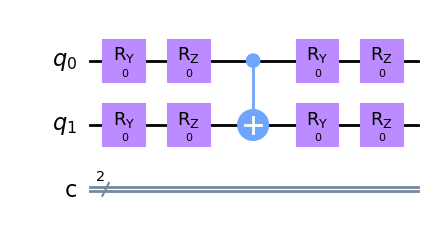

In [22]:
theta = [0, 0, 0, 0, 0, 0, 0, 0]
circ = ansatz_cx(theta)
circ.draw('mpl')

{'00 00': 269, '10 00': 240, '01 00': 240, '11 00': 251}


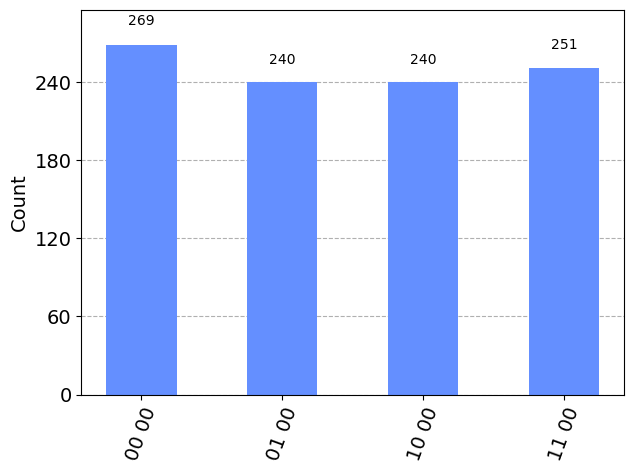

In [38]:
theta = [0, 0, 0, 0, np.pi/2, np.pi/2, 0, 0]
circ = ansatz_cx(theta)
circ.measure_all()


# Use Aer's qasm_simulator
simulator = AerSimulator()

# Execute the quantum circuit on the simulator
compiled_circuit = transpile(circ, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

# Get and print the measurement results
counts = result.get_counts(circ)
print(counts)

# Optionally, visualize the results
plot_histogram(counts)

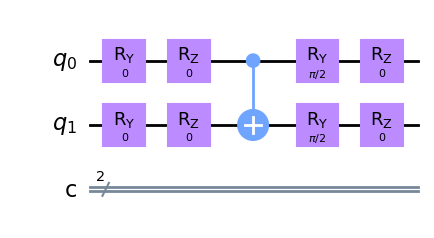

In [23]:
theta = [0, 0, 0, 0, np.pi / 2, np.pi / 2, 0, 0]
circ = ansatz_cx(theta)
circ.draw('mpl')

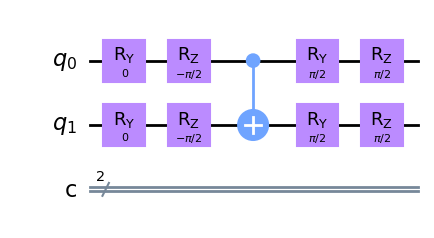

In [24]:
theta = [0, 0, -np.pi/2, -np.pi/2, np.pi / 2, np.pi / 2, np.pi / 2, np.pi / 2]
circ = ansatz_cx(theta)
circ.draw('mpl')

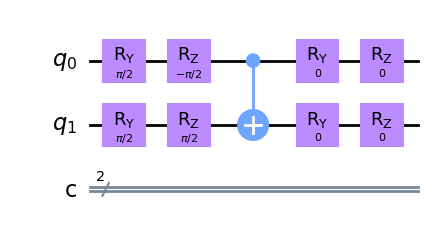

In [25]:
theta = [np.pi / 2, np.pi / 2, -np.pi/2, np.pi/2, 0, 0, 0, 0]
circ = ansatz_cx(theta)
circ.draw('mpl')

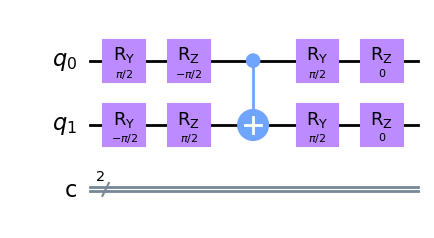

In [26]:
theta = [np.pi / 2, -np.pi / 2, -np.pi/2, np.pi/2, np.pi/2, np.pi/2, 0, 0]
circ = ansatz_cx(theta)
circ.draw('mpl')

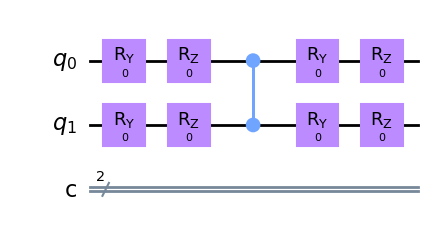

In [28]:
theta = [0, 0, 0, 0, 0, 0, 0, 0]
circ = ansatz_cz(theta)
circ.draw('mpl')